In [753]:
# ライブラリの取得
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(font="IPAexGothic",style="white")　多分いらなそう
# import oandapy
import configparser
import datetime
from datetime import datetime, timedelta

import warnings
warnings.simplefilter('ignore')

# CSVデータの読み込み
import os
working_directory=os.getcwd()
#print(working_directory)
path_train=working_directory+'/train_finance.csv'
path_test=working_directory+'/test_finance.csv'
# path_test=working_directory+'/test_finance_last10elminate.csv'
path_latest=working_directory+'/test_latest.csv'
path_submit=working_directory+'/submit_finance.csv'

#データフレームの生成
df_train=pd.read_csv(path_train)
df_test=pd.read_csv(path_test)
df_latest=pd.read_csv(path_latest)
df_submit=pd.read_csv(path_submit)

In [754]:
#データの確認
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2074 non-null   object 
 1   High    2074 non-null   float64
 2   Low     2074 non-null   float64
 3   Open    2074 non-null   float64
 4   Close   2074 non-null   float64
dtypes: float64(4), object(1)
memory usage: 81.1+ KB


In [755]:
#データの確認
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1246 non-null   object 
 1   High    1246 non-null   float64
 2   Low     1246 non-null   float64
 3   Open    1246 non-null   float64
 4   Close   1246 non-null   float64
dtypes: float64(4), object(1)
memory usage: 48.8+ KB


In [756]:
# Dateがobject型になっているので日付型に変換
df_train['Date']=pd.to_datetime(df_train['Date'],format='%Y/%m/%d')
df_test['Date']=pd.to_datetime(df_test['Date'],format='%Y/%m/%d')
df_latest['Date']=pd.to_datetime(df_latest['Date'],format='%Y/%m/%d')

In [757]:
# fig = plt.subplots(figsize=(30,10))
# plt.plot(df_train)

In [758]:
df_train

,Date,High,Low,Open,Close
0,2003-12-01,111.370639,110.482062,111.314347,110.676377
1,2003-12-02,112.008532,110.500532,110.639316,111.823016
2,2003-12-03,112.202814,111.712284,111.832477,112.137524
3,2003-12-04,112.332259,111.406851,112.110343,111.748717
4,2003-12-05,112.766375,111.609834,111.721723,112.729259
...,...,...,...,...,...
2069,2011-12-08,124.476855,123.126484,123.959751,123.984661
2070,2011-12-09,124.227770,122.895824,123.445260,123.445260
2071,2011-12-12,123.745819,122.202555,123.681290,123.687906
2072,2011-12-13,122.393352,121.174807,121.782641,121.832361


In [759]:
df_train

,Date,High,Low,Open,Close
0,2003-12-01,111.370639,110.482062,111.314347,110.676377
1,2003-12-02,112.008532,110.500532,110.639316,111.823016
2,2003-12-03,112.202814,111.712284,111.832477,112.137524
3,2003-12-04,112.332259,111.406851,112.110343,111.748717
4,2003-12-05,112.766375,111.609834,111.721723,112.729259
...,...,...,...,...,...
2069,2011-12-08,124.476855,123.126484,123.959751,123.984661
2070,2011-12-09,124.227770,122.895824,123.445260,123.445260
2071,2011-12-12,123.745819,122.202555,123.681290,123.687906
2072,2011-12-13,122.393352,121.174807,121.782641,121.832361


In [760]:
# Dateが日付型に変更されたかどうかの確認
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2074 non-null   datetime64[ns]
 1   High    2074 non-null   float64       
 2   Low     2074 non-null   float64       
 3   Open    2074 non-null   float64       
 4   Close   2074 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 81.1 KB


In [761]:
# Dateが日付型に変更されたかどうかの確認
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1246 non-null   datetime64[ns]
 1   High    1246 non-null   float64       
 2   Low     1246 non-null   float64       
 3   Open    1246 non-null   float64       
 4   Close   1246 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 48.8 KB


In [762]:
# Dateが日付型に変更されたかどうかの確認
df_latest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10 non-null     datetime64[ns]
 1   High    10 non-null     float64       
 2   Low     10 non-null     float64       
 3   Open    10 non-null     float64       
 4   Close   10 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 528.0 bytes


In [763]:
df_train.head()

,Date,High,Low,Open,Close
0,2003-12-01,111.370639,110.482062,111.314347,110.676377
1,2003-12-02,112.008532,110.500532,110.639316,111.823016
2,2003-12-03,112.202814,111.712284,111.832477,112.137524
3,2003-12-04,112.332259,111.406851,112.110343,111.748717
4,2003-12-05,112.766375,111.609834,111.721723,112.729259


In [764]:
#データの確認
df_train.describe()

,High,Low,Open,Close
count,2074.000000,2074.000000,2074.000000,2074.000000
mean,124.078238,122.910559,123.526205,123.529490
std,9.210193,9.493319,9.188003,9.184970
min,108.520946,6.743457,107.993884,107.998923
25%,117.002707,115.863246,116.408944,116.427990
50%,123.242134,121.951219,122.590435,122.573382
75%,130.814157,129.393252,130.201913,130.179930
max,148.260942,146.834717,147.832063,147.888796


In [765]:
#データの確認
df_test.describe()

,High,Low,Open,Close
count,1246.000000,1246.000000,1246.000000,1246.000000
mean,111.424603,110.675657,111.069958,111.070373
std,9.206534,9.270658,9.215541,9.214999
min,96.767439,70.352906,96.364197,96.357173
25%,103.722807,103.064503,103.422443,103.422154
50%,108.456692,107.796669,108.091687,108.082215
75%,120.690221,119.751722,120.218867,120.219641
max,129.417693,128.691531,128.851618,128.858797


In [766]:
#データの確認
df_latest.describe()

,High,Low,Open,Close
count,10.000000,10.000000,10.000000,10.000000
mean,103.334161,102.926054,103.071625,103.074446
std,0.361769,0.337125,0.340458,0.340053
min,102.720708,102.515795,102.629538,102.632956
25%,103.155731,102.769785,102.843781,102.842064
50%,103.281038,102.817198,103.000376,103.011844
75%,103.464673,102.943638,103.359891,103.364806
max,103.979324,103.606639,103.641461,103.621249


In [767]:
#欠損値の確認
print(f'欠損データ確認(df_train)\n{df_train.isnull().sum()}\n')
print(f'欠損データを確認(df_test)\n{df_test.isnull().sum()}\n')

欠損データ確認(df_train)
Date     0
High     0
Low      0
Open     0
Close    0
dtype: int64

欠損データを確認(df_test)
Date     0
High     0
Low      0
Open     0
Close    0
dtype: int64



##　配列の型などを調べるための関数

In [768]:
# 変数名をそのままprint関数内で表示させる関数
def chkprint(*args):
    for obj in args:
        for k, v in globals().items():
            if id(v) == id(obj):
                target = k
                break          
    return target

# データがどのデータ型か、列数、行数を表示する関数
def typeInfo(targetData):
    if (type(targetData) is pd.core.frame.DataFrame):
        print("{} は DataFrame型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is list):
        print("{} は list型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), pd.DataFrame(targetData).shape))    # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is np.ndarray):
        print("{} は ndarray型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is pd.core.series.Series):
        print("{} は Series型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる

## Trainデータを学習用と検証用に分割
#### (train:2003/12/1-2011/12/14 →これを8:2に分割する| test:2011/12/15-2019/12/31)

In [769]:
# 不要
# Trainデータを学習用と検証用に分割
# 今回は①学習用：8割、②検証用：2割にTrainデータを分割して、①の予測モデルで
# ②が正しく評価できるのかを確認した上で、testデータへの予測モデルの適用を行う

In [770]:
# 不要
# train_test_splitというDataFrameを分けてくれる関数がsklearnにあるのでそれを使う
# from sklearn.model_selection import train_test_split

# df_train, df_validation = train_test_split(df_train, train_size=0.8, test_size=0.2, shuffle=False)

In [771]:
# 不要
# # 分割後のサイズ
# print(f'①学習用データのサイズ(df_train)：{len(df_train)}')
# print(f'②検証用データのサイズ(df_validation)：{len(df_validation)}')
# print(f'元々のdf_trainのサイズが8:2に分割された\n')

# # 分割後の詳細
# print(f'分割後のサマリ(df_train)\n{df_train.describe()}\n')
# print(f'分割後のサマリ(df_validation)\n{df_validation.describe()}\n')

## *Train/test/latestデータの縦結合(直接今回の課題とは関係なし)

In [772]:
# df_Merged=pd.concat([df_train,df_test,df_latest])
df_Merged = pd.DataFrame(np.concatenate([df_train.values, df_test.values, df_latest.values]), columns=df_train.columns)

In [773]:
df_Merged

,Date,High,Low,Open,Close
0,2003-12-01,111.370639,110.482062,111.314347,110.676377
1,2003-12-02,112.008532,110.500532,110.639316,111.823016
2,2003-12-03,112.202814,111.712284,111.832477,112.137524
3,2003-12-04,112.332259,111.406851,112.110343,111.748717
4,2003-12-05,112.766375,111.609834,111.721723,112.729259
...,...,...,...,...,...
3325,2019-12-19,103.067513,102.766359,102.822331,102.822331
3326,2019-12-26,102.720708,102.515795,102.629538,102.632956
3327,2019-12-27,103.421288,102.67499,102.686502,102.685356
3328,2019-12-30,103.791471,103.429382,103.429382,103.436318


In [774]:
df_Merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330 entries, 0 to 3329
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3330 non-null   datetime64[ns]
 1   High    3330 non-null   object        
 2   Low     3330 non-null   object        
 3   Open    3330 non-null   object        
 4   Close   3330 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 130.2+ KB


##　LSTMモデルへ訓練させるための前処理

In [775]:
# 多項式特徴量を適用してみる
df_train['Close']=df_train['Close']**2


In [776]:
##　LSTMモデルへ訓練させるための前処理

In [777]:
# windowを設定
window_len=6
# window_len=6 #11/6の中間報告でのアドバイスを受け修正しようとしたが、後に出てくる未来予測のところでエラーが出るため一旦保留

In [778]:
# # Closeの単価だけ抽出
# df_train=df_train['Close']
# df_test=df_test['Close']
# df_latest=df_latest['Close']

In [779]:
# Dateそぎ落とし
# del df_train['Date']
# del df_test['Date']
# del df_latest['Date']

In [780]:
# Dateをインデックスに指定
df_train.set_index('Date',inplace=True)
df_test.set_index('Date',inplace=True)
df_latest.set_index('Date',inplace=True)

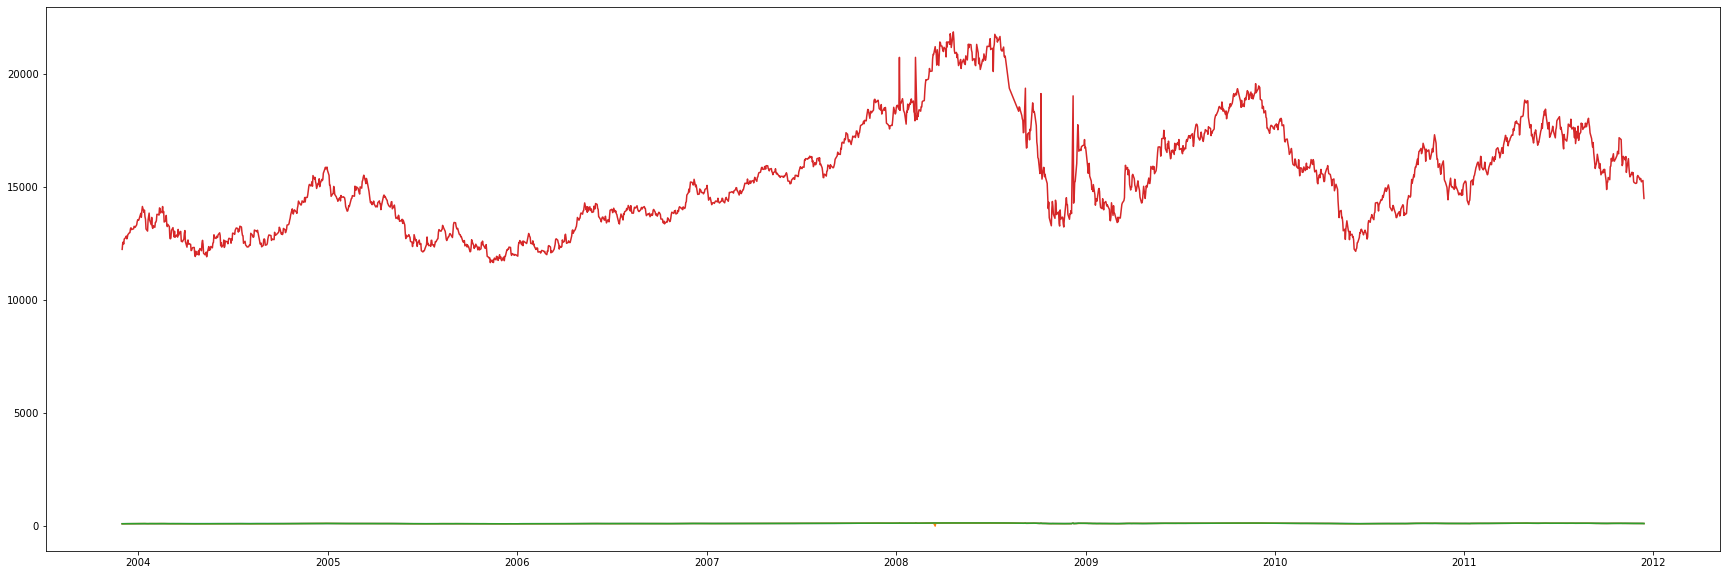

In [781]:
fig = plt.subplots(figsize=(30,10))
plt.plot(df_train)

In [782]:
# 分割後の詳細
print(f'単価抽出後のサマリ(df_train)\n{df_train.describe()}\n')
print(f'単価抽出後のサマリ(df_test)\n{df_test.describe()}\n')
print(f'単価抽出後のサマリ(df_latest)\n{df_latest.describe()}\n')

単価抽出後のサマリ(df_train)
              High          Low         Open         Close
count  2074.000000  2074.000000  2074.000000   2074.000000
mean    124.078238   122.910559   123.526205  15343.857776
std       9.210193     9.493319     9.188003   2314.279286
min     108.520946     6.743457   107.993884  11663.767447
25%     117.002707   115.863246   116.408944  13555.476925
50%     123.242134   121.951219   122.590435  15024.234077
75%     130.814157   129.393252   130.201913  16946.814362
max     148.260942   146.834717   147.832063  21871.096080

単価抽出後のサマリ(df_test)
              High          Low         Open        Close
count  1246.000000  1246.000000  1246.000000  1246.000000
mean    111.424603   110.675657   111.069958   111.070373
std       9.206534     9.270658     9.215541     9.214999
min      96.767439    70.352906    96.364197    96.357173
25%     103.722807   103.064503   103.422443   103.422154
50%     108.456692   107.796669   108.091687   108.082215
75%     120.690221   11

In [783]:
df_train.head()

,High,Low,Open,Close
Date,,,,
2003-12-01,111.370639,110.482062,111.314347,12249.260452
2003-12-02,112.008532,110.500532,110.639316,12504.386931
2003-12-03,112.202814,111.712284,111.832477,12574.824331
2003-12-04,112.332259,111.406851,112.110343,12487.775780
2003-12-05,112.766375,111.609834,111.721723,12707.885730


In [784]:
# LSTMへの入力用に処理の関数

def data_maker(data):
  data_lstm_in=[]
  if len(data)==window_len:
    temp = data[:window_len].copy()
    temp = temp / temp.iloc[0] - 1
    data_lstm_in.append(temp)
  for i in range(len(data) - window_len): #今回のLSTMで生成する時系列データ数(train総数-10個のモデル)
      temp = data[i:(i + window_len)].copy() #windowの単位で行を取得。参照渡しでなく値渡し。
      temp = temp / temp.iloc[0] - 1
      data_lstm_in.append(temp)
  return data_lstm_in

In [785]:
#関数の実行(Trainデータ)
train_lstm_in = data_maker(df_train)

In [786]:
# 配列抜粋
print(f'train_lstm_in_配列数 : {len(train_lstm_in)}\n')
print(f'train_lstm_in[0]\n{train_lstm_in[0]}\n')
print(f'train_lstm_in[1]\n{train_lstm_in[1]}\n')
print(f'train_lstm_in[-1]\n{train_lstm_in[-1]}\n')

train_lstm_in_配列数 : 2068

train_lstm_in[0]
                High       Low      Open     Close
Date                                              
2003-12-01  0.000000  0.000000  0.000000  0.000000
2003-12-02  0.005728  0.000167 -0.006064  0.020828
2003-12-03  0.007472  0.011135  0.004655  0.026578
2003-12-04  0.008634  0.008370  0.007151  0.019472
2003-12-05  0.012532  0.010208  0.003660  0.037441
2003-12-08  0.016610  0.017587  0.011134  0.043078

train_lstm_in[1]
                High       Low      Open     Close
Date                                              
2003-12-02  0.000000  0.000000  0.000000  0.000000
2003-12-03  0.001735  0.010966  0.010784  0.005633
2003-12-04  0.002890  0.008202  0.013296 -0.001328
2003-12-05  0.006766  0.010039  0.009783  0.016274
2003-12-08  0.010820  0.017417  0.017303  0.021796
2003-12-09  0.013873  0.021090  0.021741  0.026809

train_lstm_in[-1]
                High       Low      Open     Close
Date                                              
20

In [787]:
lstm_train_out = (df_train['Open'][window_len:].values / df_train['Open'][:-window_len].values)-1

In [788]:
lstm_train_out

array([ 0.01554517,  0.02408164,  0.00835086, ..., -0.00716682,
       -0.01876104, -0.02665515])

In [789]:
#関数の実行(Testデータ)
test_lstm_in = data_maker(df_test)

In [790]:
# 配列抜粋(Testデータ)
print(f'test_lstm_in_配列数 : {len(test_lstm_in)}\n')
print(f'test_lstm_in[0]\n{test_lstm_in[0]}\n')
print(f'test_lstm_in[1]\n{test_lstm_in[1]}\n')
print(f'test_lstm_in[-1]\n{test_lstm_in[-1]}\n')

test_lstm_in_配列数 : 1240

test_lstm_in[0]
                High       Low      Open     Close
Date                                              
2011-12-15  0.000000  0.000000  0.000000  0.000000
2011-12-16  0.002682  0.003395  0.003284  0.003205
2011-12-19 -0.000613  0.001701  0.003741  0.003768
2011-12-20  0.006356  0.002625  0.001587  0.001522
2011-12-21  0.011123  0.005055  0.007748  0.007696
2011-12-22  0.005366  0.004675  0.003898  0.004003

test_lstm_in[1]
                High       Low      Open     Close
Date                                              
2011-12-16  0.000000  0.000000  0.000000  0.000000
2011-12-19 -0.003286 -0.001688  0.000456  0.000561
2011-12-20  0.003664 -0.000767 -0.001691 -0.001678
2011-12-21  0.008418  0.001655  0.004450  0.004476
2011-12-22  0.002676  0.001276  0.000613  0.000795
2011-12-29 -0.010705 -0.011202 -0.008001 -0.007860

test_lstm_in[-1]
                High       Low      Open     Close
Date                                              
2019-1

In [791]:
lstm_test_out = (df_test['Open'][window_len:].values / df_test['Open'][:-window_len].values)-1

In [792]:
lstm_test_out

array([-0.00474374, -0.00597099, -0.00581912, ..., -0.00734906,
        0.0050652 ,  0.00605043])

In [793]:
# #関数の実行(Latestデータ)
# latest_lstm_in = data_maker(df_latest)

In [794]:
# # 配列抜粋
# print(f'latest_lstm_in_配列数 : {len(latest_lstm_in)}\n')
# print(f'latest_lstm_in\n{latest_lstm_in[0]}\n')
# #print(f'latest_lstm_in\n{latest_lstm_in[1]}\n')
# # print(f'latest_lstm_in\n{latest_lstm_in[-1]}\n')

## Numpy配列への変換

In [795]:
# PandasのデータフレームからNumpy配列へ変換。リスト内包表記という記法がここでは使われている。
train_lstm_in = [np.array(train_lstm_input) for train_lstm_input in train_lstm_in]
train_lstm_in = np.array(train_lstm_in)

test_lstm_in = [np.array(test_lstm_input) for test_lstm_input in test_lstm_in]
test_lstm_in = np.array(test_lstm_in)

In [796]:
# # 11/6 latestデータのnumpyへの置き換え
# latest_lstm_in = [np.array(test_lstm_input) for test_lstm_input in latest_lstm_in]
# latest_lstm_in = np.array(latest_lstm_in)

In [797]:
print(f'train_lstm_in.shape[0] : {train_lstm_in.shape[0]}')
print(f'train_lstm_in.shape[1] : {train_lstm_in.shape[1]}')
print(f'train_lstm_in.shape[2] : {train_lstm_in.shape[2]}')

train_lstm_in.shape[0] : 2068
train_lstm_in.shape[1] : 6
train_lstm_in.shape[2] : 4


In [798]:
train_lstm_in

array([[[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.00572766,  0.00016718, -0.00606419,  0.02082791],
        [ 0.00747212,  0.01113504,  0.00465466,  0.02657825],
        [ 0.00863441,  0.0083705 ,  0.00715088,  0.01947181],
        [ 0.01253235,  0.01020774,  0.00365969,  0.03744106],
        [ 0.0166098 ,  0.01758695,  0.01113381,  0.04307777]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.00173453,  0.01096603,  0.01078424,  0.00563302],
        [ 0.0028902 ,  0.00820195,  0.0132957 , -0.00132843],
        [ 0.00676594,  0.01003888,  0.00978321,  0.01627419],
        [ 0.01082017,  0.01741687,  0.01730293,  0.02179589],
        [ 0.0138729 ,  0.02109034,  0.02174121,  0.02680869]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.00115366, -0.0027341 ,  0.00248466, -0.00692245],
        [ 0.0050227 , -0.00091709, -0.00099035,  0.01058157],
        [ 0.0090699 ,  0.00638086,  0.00644914,  0.01607234],
    

## モデルの定義

In [799]:
# モデルの定義
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [800]:
# LSTMのモデルを設定
def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()
 
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2]))) #バッチ数、時系列データ数、特徴量数
    model.add(Dropout(dropout)) 
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
 
    model.compile(loss=loss, optimizer=optimizer)
    return model

## データの学習と予測

In [801]:
np.random.seed(202)
 
# 初期モデルの構築
yen_model = build_model(train_lstm_in, output_size=1, neurons = 20)

# データを流してフィッティングさせる
yen_history = yen_model.fit(train_lstm_in, lstm_train_out, 
                            epochs=15, batch_size=1, verbose=2, shuffle=False)
# 11/5 epochs=50からepochs=10に変更
# 11/5 shuffle=TrueからFalseに変更

Epoch 1/15
2068/2068 - 4s - loss: 0.0070
Epoch 2/15
2068/2068 - 3s - loss: 0.0057
Epoch 3/15
2068/2068 - 3s - loss: 0.0052
Epoch 4/15
2068/2068 - 3s - loss: 0.0050
Epoch 5/15
2068/2068 - 3s - loss: 0.0047
Epoch 6/15
2068/2068 - 3s - loss: 0.0044
Epoch 7/15
2068/2068 - 3s - loss: 0.0041
Epoch 8/15
2068/2068 - 3s - loss: 0.0042
Epoch 9/15
2068/2068 - 3s - loss: 0.0042
Epoch 10/15
2068/2068 - 3s - loss: 0.0040
Epoch 11/15
2068/2068 - 3s - loss: 0.0041
Epoch 12/15
2068/2068 - 3s - loss: 0.0040
Epoch 13/15
2068/2068 - 3s - loss: 0.0038
Epoch 14/15
2068/2068 - 3s - loss: 0.0039
Epoch 15/15
2068/2068 - 3s - loss: 0.0038


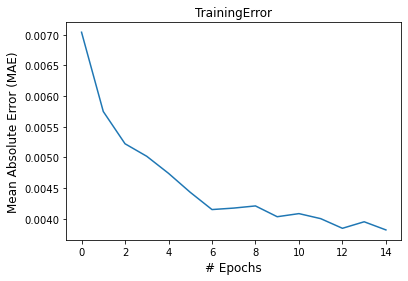

In [802]:
# MAEをプロットしてみよう
fig, ax1 = plt.subplots(1,1)
 
ax1.plot(yen_history.epoch, yen_history.history['loss'])
ax1.set_title('TrainingError')
 
if yen_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

In [803]:
#作成したモデルを使用し予測。
train_pred = yen_model.predict(train_lstm_in)
# test_pred = yen_model.predict(X_test)

In [804]:
train_pred

array([[ 0.0110768 ],
       [ 0.01454872],
       [ 0.00362936],
       ...,
       [-0.01014664],
       [-0.00681623],
       [-0.01795904]], dtype=float32)

In [805]:
np.transpose(train_pred)

array([[ 0.0110768 ,  0.01454872,  0.00362936, ..., -0.01014664,
        -0.00681623, -0.01795904]], dtype=float32)

In [806]:
len(train_pred)

2068

In [807]:
lstm_train_out

array([ 0.01554517,  0.02408164,  0.00835086, ..., -0.00716682,
       -0.01876104, -0.02665515])

In [808]:
len(lstm_train_out)

2068

In [809]:
# yen_model.score(train_pred, lstm_train_out) 

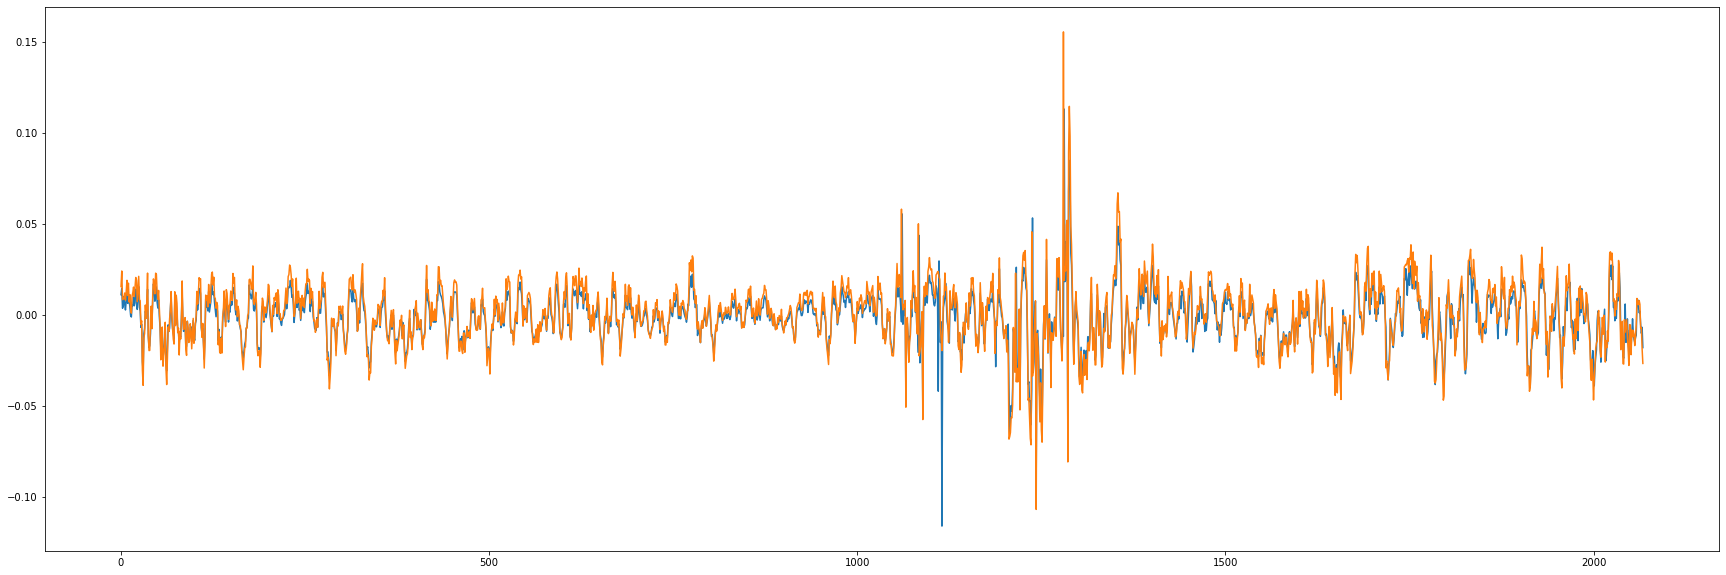

In [810]:
fig,ax = plt.subplots(figsize=(30,10))
# plt.plot(train_pred)

ax.plot(train_pred)
ax.plot(lstm_train_out)
plt.show()

In [811]:
# 配列には変化量が入っているので１００倍
np.transpose(train_pred+1)

array([[1.0110768 , 1.0145488 , 1.0036293 , ..., 0.9898534 , 0.9931838 ,
        0.98204094]], dtype=float32)

In [812]:
#予測データ(変化量)を単価に直したもの
Pred_Train_Price_Array=(np.transpose(train_pred+1)* df_train['Open'].values[:-window_len])[0]
(np.transpose(train_pred+1)* df_train['Open'].values[:-window_len])[0]

array([112.54735474, 112.24898275, 112.23835376, ..., 123.31008455,
       123.26512739, 121.58527131])

In [813]:
#正解データ(変化量)を単価に直したもの
Actual_Train_Price_Array=(1+lstm_train_out)* df_train['Open'].values[:-window_len]
(1+lstm_train_out)* df_train['Open'].values[:-window_len]

array([113.04474801, 113.30369174, 112.76637495, ..., 123.68128955,
       121.78264081, 120.50861955])

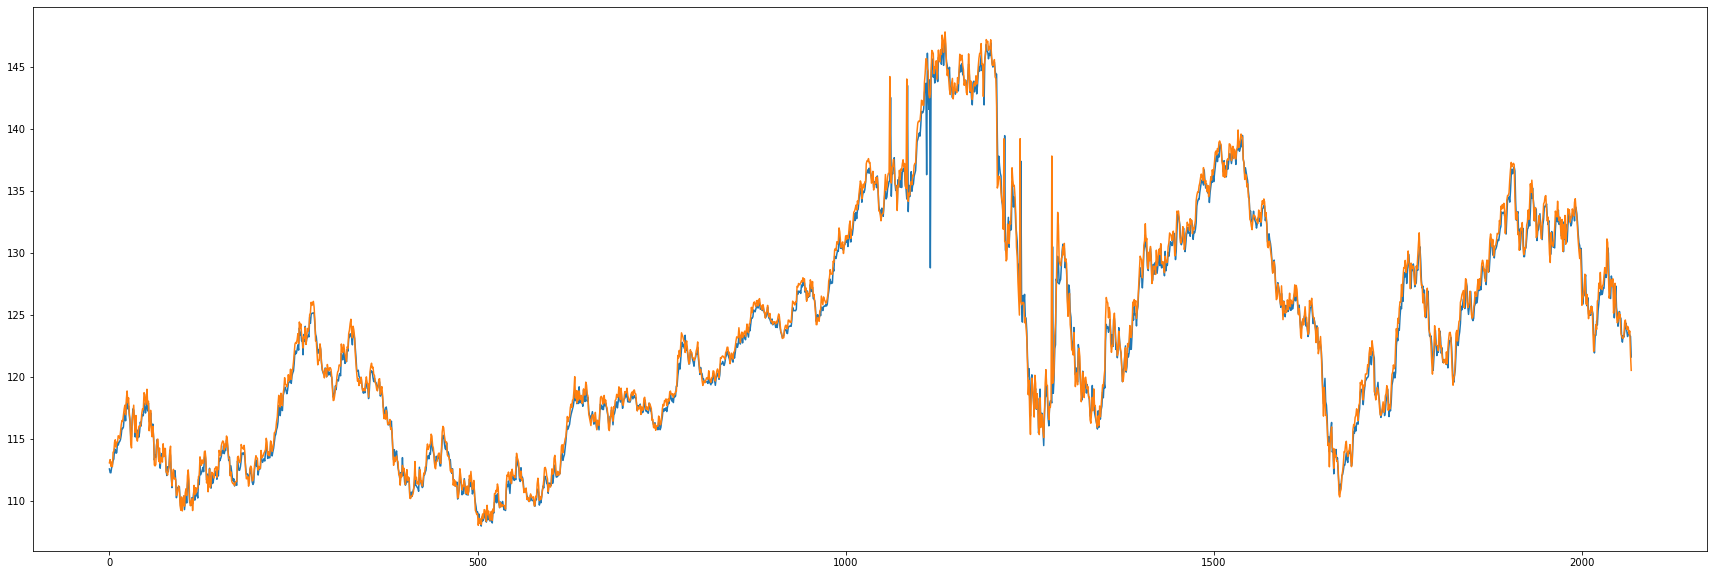

In [814]:
fig,ax = plt.subplots(figsize=(30,10))

# 予測データと正解データの併記
ax.plot(Pred_Train_Price_Array)
ax.plot(Actual_Train_Price_Array)
plt.show()

In [815]:
# #元のdf_trainデータ
# fig,ax = plt.subplots(figsize=(30,10))
# # plt.plot(train_pred)

# # ax.plot(np.transpose(train_pred+1)* df_train['Open'].values[:-window_len])
# ax.plot(df_train['Open'])
# # ax.set_xlim(datetime.datetime(2003,12,1), datetime.datetime(2011,12,14)) # 範囲指定
# plt.show()

## テストデータへの転用

In [816]:
#作成したモデルを使用し予測。
test_pred = yen_model.predict(test_lstm_in)

In [817]:
test_pred

array([[ 0.00137494],
       [-0.00851345],
       [-0.00586678],
       ...,
       [-0.00755237],
       [-0.00231986],
       [ 0.00044616]], dtype=float32)

In [818]:
len(test_pred)

1240

In [819]:
np.transpose(test_pred)

array([[ 0.00137494, -0.00851345, -0.00586678, ..., -0.00755237,
        -0.00231986,  0.00044616]], dtype=float32)

In [820]:
len(lstm_test_out)

1240

In [821]:
# 予測データ(変化量)を単価に直したもの
Pred_Price_Array=(np.transpose(test_pred+1)* df_test['Open'].values[:-window_len])[0]
(np.transpose(test_pred+1)* df_test['Open'].values[:-window_len])[0]

array([120.29816763, 119.5013489 , 119.87501539, ..., 102.6654685 ,
       102.66939745, 103.06412392])

In [822]:
typeInfo(Pred_Price_Array)

Pred_Price_Array は ndarray型
Pred_Price_Array の行数, 列数・・・(1240,)



In [823]:
# 正解データ(変化量)を単価に直したもの
Actual_Price_Array=(1+lstm_test_out)* df_test['Open'].values[:-window_len]
(1+lstm_test_out)* df_test['Open'].values[:-window_len]

array([119.56311047, 119.80778545, 119.88076121, ..., 102.68650234,
       103.42938185, 103.64146143])

In [824]:
typeInfo(Actual_Price_Array)

Actual_Price_Array は ndarray型
Actual_Price_Array の行数, 列数・・・(1240,)



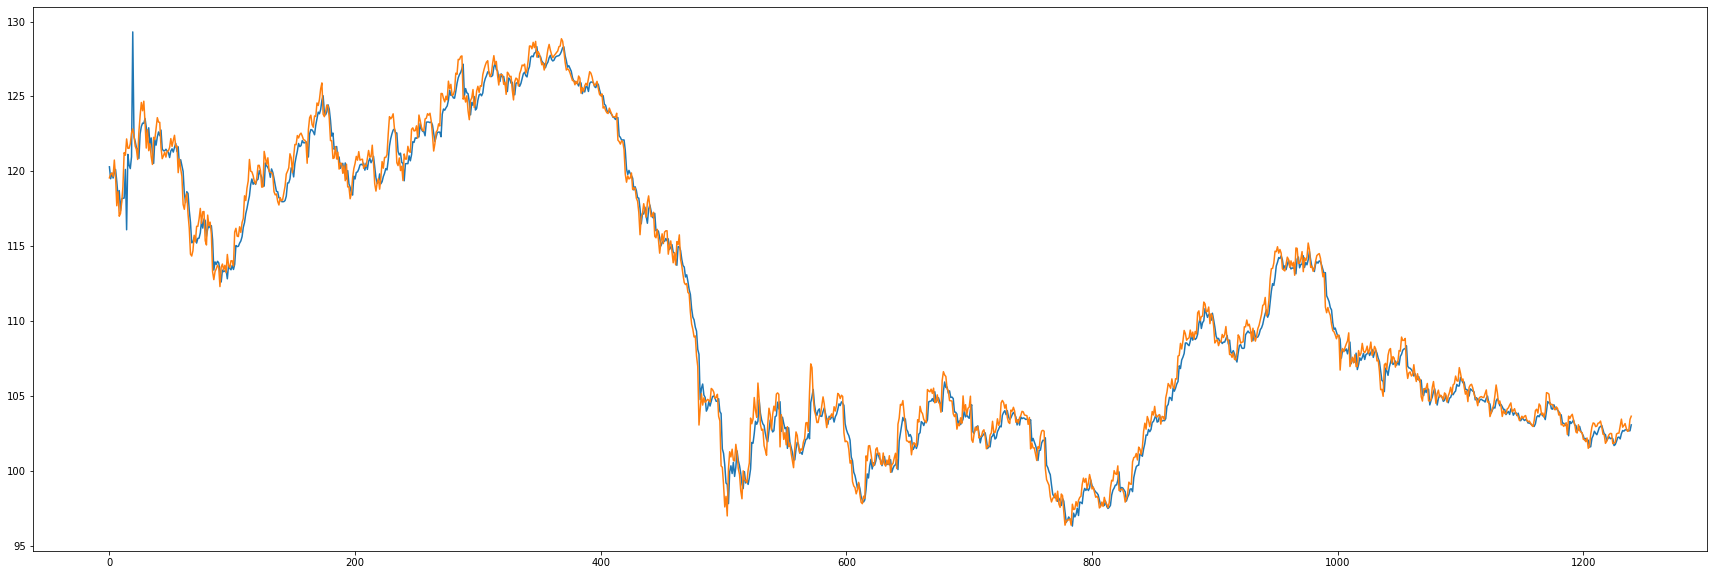

In [825]:
fig,ax = plt.subplots(figsize=(30,10))
# fig,ax = plt.subplots()

# 正解データと予測データの併記
ax.plot(Pred_Price_Array)
ax.plot(Actual_Price_Array)
plt.show()

In [826]:
Actual_Price_Array[::12]

array([119.56311047, 121.24310762, 122.63025343, 122.26716101,
       121.35922045, 117.78788537, 116.3244006 , 113.28843057,
       114.44478422, 116.57215208, 119.55538064, 119.92739379,
       119.81864691, 122.54901856, 123.66309524, 122.04775959,
       119.37023968, 120.7414186 , 119.17032272, 123.64987403,
       121.15576386, 123.75575393, 121.35285795, 126.01836622,
       124.81615186, 125.6759271 , 127.20547378, 126.61519498,
       127.09534854, 127.62668878, 127.7906692 , 126.760948  ,
       125.21659225, 125.83322525, 123.99630487, 119.80624169,
       115.76391637, 115.65535694, 115.0511843 , 112.5687626 ,
       103.05258304, 105.25956482, 100.14074236,  99.99459237,
       105.85704416, 103.76585543, 102.94363767, 101.37097597,
       103.220478  , 103.79846185, 101.98119134,  97.8929171 ,
       101.43545002,  99.89092886, 102.8966853 , 104.30291861,
       104.53394234, 104.68182355, 103.9793244 , 102.18511105,
       102.56125927, 103.23659927, 103.93258154, 101.60

In [827]:
len(Pred_Price_Array)

1240

In [828]:
Pred_Price_Array_7=Pred_Price_Array[::6]
Pred_Price_Array_7

array([120.29816763, 119.30896463, 118.20954641, 120.96695555,
       120.85854522, 122.94839945, 120.52497775, 122.75272527,
       121.26390916, 121.85975478, 119.99223533, 116.58782221,
       115.51859932, 116.7070452 , 115.42340882, 113.34836591,
       112.81882345, 113.79358221, 115.63312554, 118.34991531,
       119.40618689, 119.01206163, 120.15636434, 118.22857412,
       118.34184404, 119.62458419, 121.71475801, 120.95354248,
       123.07742989, 125.04336901, 123.38977681, 120.81538189,
       120.55933032, 118.40966919, 120.42117423, 120.12570071,
       120.284039  , 119.3045856 , 121.67473855, 122.55275256,
       119.36409496, 121.1113953 , 122.29662823, 123.27699492,
       122.51333504, 122.30522367, 124.74317705, 125.33178265,
       127.15210563, 123.7672395 , 124.7499538 , 126.19282703,
       126.40235209, 125.99772351, 125.32362075, 125.10691098,
       126.19681708, 126.99060247, 128.32209619, 127.17974628,
       127.46412612, 127.72525512, 127.39219232, 126.03

In [829]:
len(Pred_Price_Array_7)

207

In [830]:
df_test_Close_array=df_test['Close'].values
df_test_Close_array

array([120.13923079, 120.52431077, 120.59187233, ..., 102.68535554,
       103.43631774, 103.6212492 ])

In [831]:
df_test_Close_array6=df_test_Close_array[5::6]
df_test_Close_array6

array([120.62017828, 119.61567551, 119.0108633 , 121.82273448,
       120.78713596, 123.21832687, 120.4583922 , 123.26759487,
       121.35922045, 122.40306705, 119.66364235, 116.19142771,
       116.30831242, 117.29647338, 115.77551663, 113.56660515,
       113.23295444, 113.6782521 , 115.91478586, 119.35484618,
       119.1549623 , 118.94046783, 119.92739379, 118.02985877,
       119.00167793, 119.91185695, 122.44843155, 120.55258363,
       123.69617581, 125.9017241 , 123.51448625, 120.80449224,
       120.36435515, 118.54718387, 121.31147414, 120.3173697 ,
       120.56829691, 119.55693543, 122.52141833, 122.4289912 ,
       119.39642847, 121.27329916, 122.2106263 , 123.52438837,
       122.43547499, 123.01513493, 124.74713475, 125.39992481,
       127.69893676, 123.46831679, 125.35913646, 126.78527325,
       126.52513862, 125.76307237, 125.13020784, 124.76564884,
       126.72448218, 127.43679523, 128.69565457, 127.20721602,
       128.07731241, 128.02591622, 127.28598088, 126.06

In [832]:
len(df_test_Close_array6)

207

In [833]:
Dif_Array=Pred_Price_Array_7-df_test_Close_array6
Dif_Array

array([-3.22010648e-01, -3.06710878e-01, -8.01316893e-01, -8.55778925e-01,
        7.14092592e-02, -2.69927418e-01,  6.65855499e-02, -5.14869606e-01,
       -9.53112857e-02, -5.43312274e-01,  3.28592980e-01,  3.96394502e-01,
       -7.89713098e-01, -5.89428185e-01, -3.52107806e-01, -2.18239241e-01,
       -4.14130989e-01,  1.15330107e-01, -2.81660322e-01, -1.00493087e+00,
        2.51224594e-01,  7.15937947e-02,  2.28970545e-01,  1.98715347e-01,
       -6.59833888e-01, -2.87272757e-01, -7.33673543e-01,  4.00958846e-01,
       -6.18745928e-01, -8.58355092e-01, -1.24709439e-01,  1.08896579e-02,
        1.94975171e-01, -1.37514685e-01, -8.90299910e-01, -1.91668991e-01,
       -2.84257913e-01, -2.52349827e-01, -8.46679779e-01,  1.23761362e-01,
       -3.23335096e-02, -1.61903859e-01,  8.60019278e-02, -2.47393456e-01,
        7.78600480e-02, -7.09911263e-01, -3.95769387e-03, -6.81421638e-02,
       -5.46831132e-01,  2.98922703e-01, -6.09182663e-01, -5.92446227e-01,
       -1.22786525e-01,  

In [834]:
Df_Dif_Array = pd.Series(Dif_Array)
Df_Dif_Array

0     -0.322011
1     -0.306711
2     -0.801317
3     -0.855779
4      0.071409
         ...   
202   -0.342236
203    0.016911
204   -0.339903
205   -0.391623
206   -0.114225
Length: 207, dtype: float64

In [835]:
def p_judge(x):
    if x < 0:
        return 0
    else:
        return 1

In [836]:
Df_sub=Df_Dif_Array.apply(p_judge)
Df_sub

0      0
1      0
2      0
3      0
4      1
      ..
202    0
203    1
204    0
205    0
206    0
Length: 207, dtype: int64

In [837]:
Df_sub.describe()

count    207.000000
mean       0.251208
std        0.434759
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max        1.000000
dtype: float64

In [838]:
df_submit[1]=Df_sub
df_submit

,Date,1
0,2011-12-22,0
1,2012-01-05,0
2,2012-01-19,0
3,2012-02-02,0
4,2012-02-16,1
...,...,...
202,2019-10-23,0
203,2019-11-07,1
204,2019-11-21,0
205,2019-12-05,0


In [839]:
# 指定の様式（インデックスはDate、カラム名は「y」のみ）をお守りください。
df_submit = df_submit.set_index("Date") #indexにDateを指定する。
df_submit = df_submit.rename(columns={1: 'y'}) #カラム名「1」を「y」に変更する。
df_submit.to_csv('y_submit.csv') #投稿するファイルを書き出す。
df_submit #投稿する中身を確認する。

,y
Date,
2011-12-22,0
2012-01-05,0
2012-01-19,0
2012-02-02,0
2012-02-16,1
...,...
2019-10-23,0
2019-11-07,1
2019-11-21,0
